# Page View Time Series Visualizer

### Step 1: Import necessary libraries and read data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv('/Users/iamshashidharbalachandragmail.com/Downloads/Learning/Python/fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [5]:
# Clean data by removing the top and bottom 2.5%
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


### Step 2: Create the `draw_line_plot` function

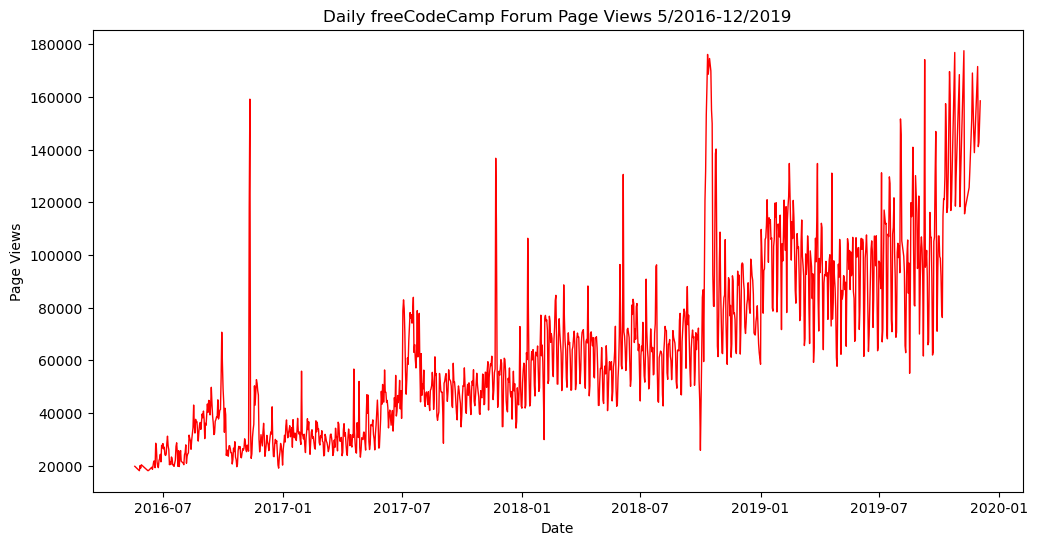

In [7]:
def draw_line_plot():
    # Create a line plot
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['value'], color='r', linewidth=1)
    
    # Add title and labels
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')

    # Save and show the plot
    plt.savefig('line_plot.png')
    plt.show()

# Call the function to generate the line plot
draw_line_plot()

### Step 3: Create the `draw_bar_plot` function

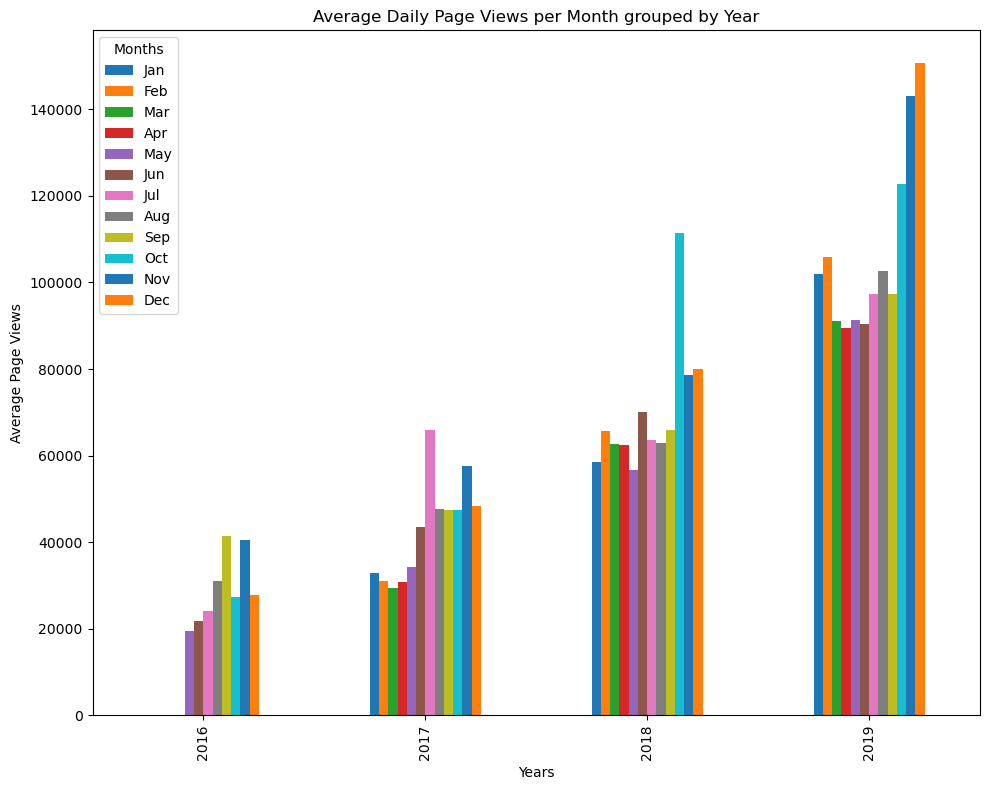

In [9]:
def draw_bar_plot():
    # Prepare data for bar plot by grouping by year and month
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month

    # Create pivot table for bar plot
    df_bar_pivot = df_bar.pivot_table(values='value', index='year', columns='month', aggfunc='mean')

    # Plot the bar chart
    df_bar_pivot.plot(kind='bar', figsize=(10, 8))
    
    # Set labels and title
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.title('Average Daily Page Views per Month grouped by Year')
    plt.legend(title='Months', labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    # Save and show the plot
    plt.tight_layout()
    plt.savefig('bar_plot.png')
    plt.show()

# Call the function to generate the bar plot
draw_bar_plot()

### Step 4: Create the `draw_box_plot` function

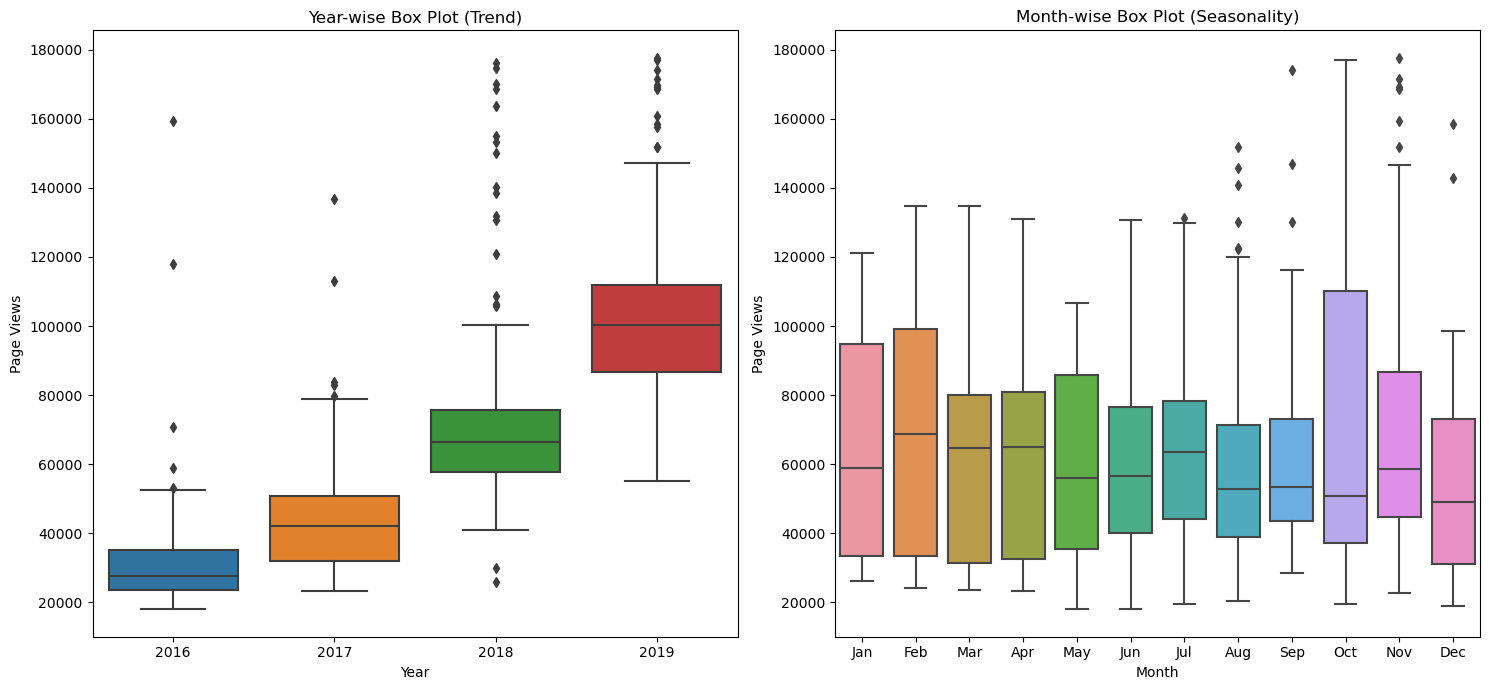

In [11]:
def draw_box_plot():
    # Prepare data for box plots
    df_box = df.copy()
    df_box['year'] = df_box.index.year
    df_box['month'] = df_box.index.strftime('%b')
    df_box['month_num'] = df_box.index.month
    
    # Sort by month number to ensure proper order in plots
    df_box = df_box.sort_values('month_num')

    # Create subplots for the two box plots
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    # Year-wise box plot
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Month-wise box plot
    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Save and show the plots
    plt.tight_layout()
    plt.savefig('box_plot.png')
    plt.show()

# Call the function to generate the box plots
draw_box_plot()